<a href="https://colab.research.google.com/github/JuanDiegoBH/Trabajo_Final_Intermedio/blob/main/Trabajo_Final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine learning y Deep learning con Python : Trabajo

In [2]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import multilabel_confusion_matrix as mcm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('A continuación se presenta una data csv de apps para Interfaz de Pagos Unificados')
print('-'*85)
print('1.UPI Banks (Interfaz de Pagos Unificados)')
print('2.Volume (Mn) By Costumers (Volumen de transacciones por cliente)')
print('3.Value (Cr) by Costumers (Valor monetario por cliente)')
print('4.Volume (Mn) (Volumen de transacciones total)')
print('5.Value (Cr) (Valor monetario total)')
print('6.Month (Mes)')
print('6.Year (Año)')
print('-'*85)

df_app = pd.read_csv("https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase5/app.csv")

labelencoder = LabelEncoder()
scaler = StandardScaler()

df_app['UPI Banks'] = labelencoder.fit_transform(df_app['UPI Banks'])
display(df_app.head())

x_standar = df_app[['Volume (Mn) By Costumers','Volume (Mn)','Value (Cr) by Costumers','Value (Cr)']]

scaler1 = StandardScaler().fit(x_standar)
X = scaler1.transform(x_standar)
X = np.c_[X,df_app['Month'],df_app['Year'],df_app['UPI Banks']]


A continuación se presenta una data csv de apps para Interfaz de Pagos Unificados
-------------------------------------------------------------------------------------
1.UPI Banks (Interfaz de Pagos Unificados)
2.Volume (Mn) By Costumers (Volumen de transacciones por cliente)
3.Value (Cr) by Costumers (Valor monetario por cliente)
4.Volume (Mn) (Volumen de transacciones total)
5.Value (Cr) (Valor monetario total)
6.Month (Mes)
6.Year (Año)
-------------------------------------------------------------------------------------


,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,1,9.04,2248.49,15.12,5732.09,12,2021
1,1,8.41,1923.95,15.90,5554.63,11,2021
2,1,7.60,1491.34,14.31,4746.79,10,2021
3,1,6.91,1520.92,11.52,3759.12,9,2021
4,1,6.14,1396.65,9.31,2941.88,8,2021


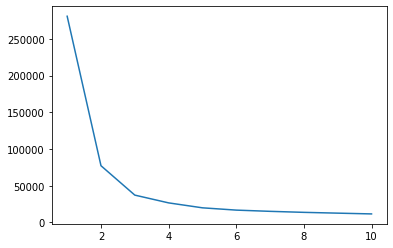

In [3]:
from sklearn.cluster import KMeans

##Clustering -> K-means
list_inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters=i) 
  k_means.fit(X)
  list_inercia.append(k_means.inertia_)

plt.plot(range(1,11),list_inercia)
plt.show()

## K = 3
k_means = KMeans(n_clusters=3)
k_means.fit(X)
y_class = k_means.labels_

In [4]:
def graph(x1,x2,y1,y2):
  fig, ax = plt.subplots(1,2)
  ax[0].scatter(x1[:, 0], x1[:, 1], c=y1, cmap=plt.cm.coolwarm)
  ax[1].scatter(x2[:, 0], x2[:, 1], c=y2, cmap=plt.cm.coolwarm)
  ax[0].set_title("Entrenamiento")
  ax[1].set_title("Validación")
  ax[0].grid()
  ax[1].grid()
  fig.show()

def graph_summ(x,y):
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.title("Descripción")
  plt.grid()
  plt.show()

In [5]:
from sklearn.decomposition import PCA

#Componentes principales.
pca = PCA(n_components=2)

#Matriz de autovectores
pca.fit(X)
Xpca = pca.transform(X)

#Reducción DIFERENCIAR los PCAs
print(X[0,:])
print('*'*100)
print(Xpca[0,:])

[-1.90616263e-01 -1.75405175e-01 -1.75962578e-01 -1.09021997e-01
  1.20000000e+01  2.02100000e+03  1.00000000e+00]
****************************************************************************************************
[-31.85554391   5.27063497]


##PREGUNTA 2

In [6]:
#PREGUNTA 2
#----------------------------------
import plotly.express as px
import matplotlib.pyplot as plt
fig1 = px.scatter(df_app,x = 'Volume (Mn)', y= 'Value (Cr)', color = 'UPI Banks',size = 'Month')
fig1.show()

#-----------------------------------

fig2 = px.scatter(df_app,x = 'Volume (Mn)', y= 'Value (Cr)', symbol = 'UPI Banks')
fig2.show()

#-----------------------------------

fig3 = px.scatter(df_app, x = 'Volume (Mn)', y= 'Value (Cr)', trendline = 'ols')
fig3.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



##PREGUNTA 3

###1. Modelo LOGIT

[[[131   1]
  [  0  65]]

 [[127   0]
  [  0  70]]

 [[135   0]
  [  1  61]]]


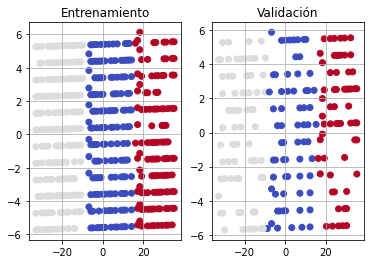

In [7]:
from sklearn.linear_model import LogisticRegression as logit

#Separar en train y test
xtrain, xtest,ytrain,ytest = tts(Xpca,y_class,test_size = .30, random_state=0)

#Definimos el modelo
m_logit = logit(max_iter=50)

#ENTRENAMIENTO
m_logit.fit(xtrain,ytrain)

#Hallar valores predichos
y_ptrain = m_logit.predict(xtrain)
y_ptest = m_logit.predict(xtest)

#Gráfica
graph(xtrain,xtest,y_ptrain,y_ptest)

#Tests o pruebas
mcm_1 = mcm(ytest,y_ptest)
print(mcm_1)


###2. Random Forest

[[[131   1]
  [  1  64]]

 [[126   1]
  [  0  70]]

 [[135   0]
  [  1  61]]]


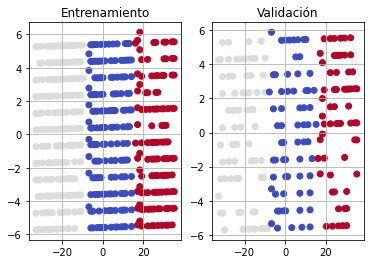

In [8]:
from sklearn.ensemble import RandomForestClassifier as rfc

##Separación de la base de datos
xtrain,xtest,ytrain,ytest = tts(Xpca,y_class,test_size =.30, random_state= 0)

#Definir modelo
RF = rfc(n_estimators=200)

#Entrenar
RF.fit(xtrain,ytrain)

#Predecir
y_ptrain = RF.predict(xtrain)
y_ptest = RF.predict(xtest)

#Gráfica
graph(xtrain,xtest,y_ptrain,y_ptest)

#Tests o pruebas
mcm_2 = mcm(ytest,y_ptest)
print(mcm_2)



###3. SVM

[[[131   1]
  [  0  65]]

 [[127   0]
  [  0  70]]

 [[135   0]
  [  1  61]]]


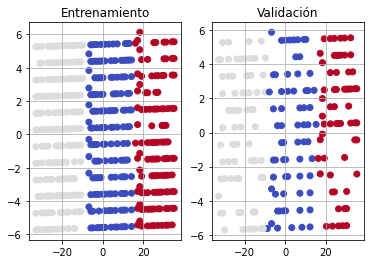

In [10]:
from sklearn.svm import SVC

##Separación de la base de datos
xtrain,xtest,ytrain,ytest = tts(Xpca,y_class,test_size =.30, random_state = 0)

#Definir modelo
svc = SVC(gamma = 'scale')

#Entrenar
svc.fit(xtrain,ytrain)

#Predecir
y_ptrain = svc.predict(xtrain)
y_ptest = svc.predict(xtest)

#Multilabel Confusion Matrix
mcm_3 = mcm(ytest,y_ptest)
print(mcm_3)

#Gráfica
graph(xtrain,xtest,y_ptrain,y_ptest)

###4. Modelo KNN

[[[131   1]
  [  1  64]]

 [[126   1]
  [  0  70]]

 [[135   0]
  [  1  61]]]


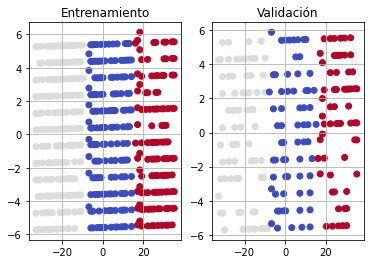

In [11]:
from sklearn.neighbors import KNeighborsClassifier as knn

#Separación
xtrain,xtest,ytrain,ytest = tts(Xpca,y_class,test_size =.3, random_state = 0)

#Modelación y Entrenamiento 
modelo_knn = knn(n_neighbors=3)
modelo_knn.fit(xtrain, ytrain)
yptrain_3 = modelo_knn.predict(xtrain)
yptest_3 = modelo_knn.predict(xtest)

#VALIDACIÓN
mcm_4 = mcm(ytest,yptest_3)
print(mcm_4)

#Gráfico
graph(xtrain,xtest,yptrain_3,yptest_3)
